## Pre-process data

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('../data/nlp/toxic-comments/train.csv')
display(train_df.head())
for txt in train_df.sample(15).comment_text:
    print(txt)
    print("-"*20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Finalisation of entries to Riverina Template
Hi Matt and GW.  I have tried to progress systematically across various road maps to include, as far as I can tell most rural community, hamlet, villages and towns within the template.  The odd ghost town which is not on a conventional map, for example Mitta Mitta and Brushwood will be found as we travel around looking for photographs.   There may be one or two errors which no doubt will be adjusted as we go through and complete articles and additions.  However after combing through the maps tonight and double checking all of the names I think the current list is very complete and you might like to use it for basis of the checklists that you have created/are creating both here and on Wiki Commons. talk...
--------------------
Ah! I'll see if I can maybe dig something up before the vultures descend again. Just out of interest, why is someone on the other side of the planet interested in the Rochdale Observer?  Fatuorum
--------------------
I 

### Pre processing
These is some rubbish in the text, but we do not care for now. We simply stack all the toxic comments as a single label

In [120]:
def is_toxic(c: pd.Series):
    cols = ["severe_toxic", "obscene", "threat", "insult", "identity_hate"]
    return int(any(c[col] == 1 for col in cols))

assert is_toxic(train_df.iloc[0]) == False
assert is_toxic(train_df[train_df.threat == 1].iloc[0]) == True
assert is_toxic(train_df[train_df.obscene == 1].iloc[0]) == True

There are observations that we do not have ground truth for 

In [35]:
test_text_df = pd.read_csv('../data/nlp/toxic-comments/test.csv')
test_label_df = pd.read_csv('../data/nlp/toxic-comments/test_labels.csv')
display(test_label_df.head())

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [50]:
def ignored(c: pd.Series):
    cols = ["severe_toxic", "obscene", "threat", "insult", "identity_hate"]
    return all(c[col] == -1 for col in cols)

ignored_mask = test_label_df.apply(ignored, axis=1)
num_ignored = sum(ignored_mask)
num_obs = len(ignored_mask)
print(f'There are {num_obs} test observations, and {num_ignored} ({num_ignored / num_obs :.4f}) of them are unlabeled. Leaving {num_obs - num_ignored} useful')

There are 153164 test observations, and 89186 (0.5823) of them are unlabeled. Leaving 63978 useful


Wow, almost 60% of the test observations are useless. Well there are still almost 64000 left so they will have to do.

In [82]:
keep_mask = np.logical_not(ignored_mask.values)
test_df = pd.concat((test_text_df, test_label_df), axis=1).iloc[keep_mask]

In [108]:
def pre_process(df: pd.DataFrame) -> pd.DataFrame:        
    return pd.DataFrame({
        'comment': df.comment_text,
        'toxic': df.apply(is_toxic, axis=1)
    })

processed_train_df = pre_process(train_df)
processed_test_df = pre_process(test_df)

Label distributions look representative 

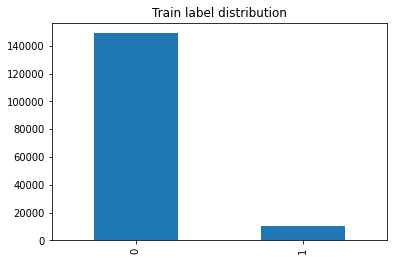

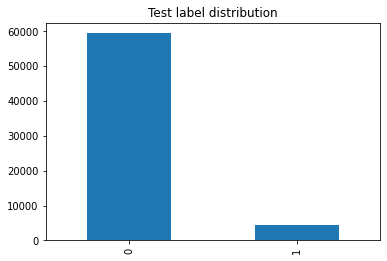

In [116]:
processed_train_df.toxic.value_counts().plot(kind='bar', title='Train label distribution')
plt.show()
processed_test_df.toxic.value_counts().plot(kind='bar', title='Test label distribution')
plt.show()

In [118]:
processed_train_df.to_csv('../data/nlp/toxic-comments/processed_train.csv')
processed_test_df.to_csv('../data/nlp/toxic-comments/processed_test.csv')